In [59]:
!python -V

Python 3.12.3


In [60]:
import mlflow 

mlflow.set_tracking_uri("sqlite:////Users/tahir/Desktop/Github/MLOps_zoomcamp/Week2-experiment-tracking/mlflow.db")
mlflow.set_experiment("nyc-taxi-experiment")
print(mlflow.get_tracking_uri())

sqlite:////Users/tahir/Desktop/Github/MLOps_zoomcamp/Week2-experiment-tracking/mlflow.db


In [61]:
import pandas as pd

In [62]:
import pickle

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [65]:
df = pd.read_parquet('../data/green_tripdata_2021-01.parquet')

df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

df = df[(df.duration >= 1) & (df.duration <= 60)]

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

In [66]:
df.transpose().head(100)

0                    1      \
VendorID                                 2                    2   
lpep_pickup_datetime   2021-01-01 00:15:56  2021-01-01 00:25:59   
lpep_dropoff_datetime  2021-01-01 00:19:52  2021-01-01 00:34:44   
store_and_fwd_flag                       N                    N   
RatecodeID                             1.0                  1.0   
PULocationID                            43                  166   
DOLocationID                           151                  239   
passenger_count                        1.0                  1.0   
trip_distance                         1.01                 2.53   
fare_amount                            5.5                 10.0   
extra                                  0.5                  0.5   
mta_tax                                0.5                  0.5   
tip_amount                             0.0                 2.81   
tolls_amount                           0.0                  0.0   
ehail_fee                             None                 None   
improvement_surcharge                  0.3                  0.3   
total_amount                           6.8                16.86   
payment_type                           2.0                  1.0   
trip_type                              1.0                  1.0   
congestion_surcharge                   0.0                 2.75   
duration                          3.933333                 8.75   

                                     2                    3      \
VendorID                                 2                    2   
lpep_pickup_datetime   2021-01-01 00:45:57  2020-12-31 23:57:51   
lpep_dropoff_datetime  2021-01-01 00:51:55  2021-01-01 00:04:56   
store_and_fwd_flag                       N                    N   
RatecodeID                             1.0                  1.0   
PULocationID                            41                  168   
DOLocationID                            42                   75   
passenger_count                        1.0                  1.0   
trip_distance                         1.12                 1.99   
fare_amount                            6.0                  8.0   
extra                                  0.5                  0.5   
mta_tax                                0.5                  0.5   
tip_amount                             1.0                  0.0   
tolls_amount                           0.0                  0.0   
ehail_fee                             None                 None   
improvement_surcharge                  0.3                  0.3   
total_amount                           8.3                  9.3   
payment_type                           1.0                  2.0   
trip_type                              1.0                  1.0   
congestion_surcharge                   0.0                  0.0   
duration                          5.966667             7.083333   

                                     7                    9      \
VendorID                                 2                    2   
lpep_pickup_datetime   2021-01-01 00:26:31  2021-01-01 00:58:32   
lpep_dropoff_datetime  2021-01-01 00:28:50  2021-01-01 01:32:34   
store_and_fwd_flag                       N                    N   
RatecodeID                             1.0                  1.0   
PULocationID                            75                  225   
DOLocationID                            75                  265   
passenger_count                        6.0                  1.0   
trip_distance                         0.45                12.19   
fare_amount                            3.5                 38.0   
extra                                  0.5                  0.5   
mta_tax                                0.5                  0.5   
tip_amount                            0.96                 2.75   
tolls_amount                           0.0                  0.0   
ehail_fee                             None                 None   
improvement_sur

In [67]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.838799799829445

/var/folders/hc/rv0ch5hn293cmmlwhw7w_drh0000gn/T/ipykernel_31077/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/var/folders/hc/rv0ch5hn293cmmlwhw7w_drh0000gn/T/ipykernel_31077/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, lab

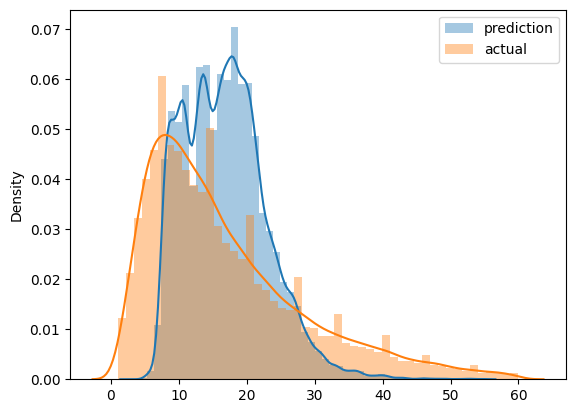

In [68]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [69]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [70]:
df_train = read_dataframe('../data/green_tripdata_2021-01.parquet')
df_val = read_dataframe('../data/green_tripdata_2021-02.parquet')

In [71]:
len(df_train), len(df_val)

(73908, 61921)

In [72]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [73]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [74]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [75]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.758715208946364

In [76]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [77]:
from mlflow import log_metric, log_param, log_artifacts

In [83]:
with mlflow.start_run(run_name="Lasso Regression Experiment: Alpha:0.01", nested=True) as run:
    
    print(f"Run ID: {run.info.run_id}")

    # Set a tag to show whose working on this experiment 
    mlflow.set_tag("developer", "Tahir")

    # 
    mlflow.log_param("Train-data-path", "../data/green_tripdata_2021-01")
    mlflow.log_param("Validate-data-path",  "../data/green_tripdata_2021-02")

    alpha = 0.009
    # Log the parameter
    mlflow.log_param("alpha", alpha)

    # Train the model 
    lr = Lasso(alpha)
    lr.fit(X_train, y_train)

    # Predict from the model
    y_pred = lr.predict(X_val)

    # Calculate the RMSE 
    rmse = mean_squared_error(y_val, y_pred, squared=False)

    # Log the RMSE in mlflow 
    mlflow.log_metric("rmse", rmse)

    mlflow.end_run()

Run ID: 3e7ca327b69c47bb9ebfbe5f63b3aed2


/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [90]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_val, label=y_val)

In [91]:
import xgboost as xgb

# Hyperopt is some library which uses some baysian methods to find the best set of hyperparameters
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials # hp -> define search space, Trials keeps track of 
from hyperopt.pyll import scope

def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(     
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50
        )
        y_pred = booster.predict(valid)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)

    return {'loss': rmse, 'status': STATUS_OK}


In [92]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:linear',
    'seed': 42
}

best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=Trials()
)


  0%|                                                                                                                        | 0/50 [00:00<?, ?trial/s, best loss=?]

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:42:35] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.65917                                                                                                                                        
[1]	validation-rmse:11.15394                                                                                                                                        
[2]	validation-rmse:10.69382                                                                                                                                        
[3]	validation-rmse:10.27529                                                                                                                                        
[4]	validation-rmse:9.89593                                                                                                                                         
[5]	validation-rmse:9.55252                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:43:48] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.35923                                                                                                                                        
[1]	validation-rmse:10.62395                                                                                                                                        
[2]	validation-rmse:9.99464                                                                                                                                         
[3]	validation-rmse:9.45718                                                                                                                                         
[4]	validation-rmse:9.00079                                                                                                                                         
[5]	validation-rmse:8.61503                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:44:43] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.86150                                                                                                                                        
[1]	validation-rmse:9.81445                                                                                                                                         
[2]	validation-rmse:9.01166                                                                                                                                         
[3]	validation-rmse:8.40318                                                                                                                                         
[4]	validation-rmse:7.94404                                                                                                                                         
[5]	validation-rmse:7.59595                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:45:24] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:9.54729                                                                                                                                         
[2]	validation-rmse:8.72165                                                                                                                                         
[3]	validation-rmse:8.13112                                                                                                                                         
[4]	validation-rmse:7.71344                                                                                                                                         
[5]	validation-rmse:7.41896                                                                                                                                         
[6]	validation-rmse:7.21248                                                                                                                                         
[7]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:46:11] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.73287                                                                                                                                        
[1]	validation-rmse:9.62070                                                                                                                                         
[2]	validation-rmse:8.79410                                                                                                                                         
[3]	validation-rmse:8.18487                                                                                                                                         
[4]	validation-rmse:7.74769                                                                                                                                         
[5]	validation-rmse:7.43059                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:46:50] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.66550                                                                                                                                        
[1]	validation-rmse:9.51398                                                                                                                                         
[2]	validation-rmse:8.67213                                                                                                                                         
[3]	validation-rmse:8.06428                                                                                                                                         
[4]	validation-rmse:7.63381                                                                                                                                         
[5]	validation-rmse:7.32992                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:47:42] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[9]	validation-rmse:7.34259                                                                                                                                         
[10]	validation-rmse:7.23580                                                                                                                                        
[11]	validation-rmse:7.15154                                                                                                                                        
[12]	validation-rmse:7.08588                                                                                                                                        
[13]	validation-rmse:7.03293                                                                                                                                        
[14]	validation-rmse:6.99258                                                                                                                                        
[15]	valid

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:48:04] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.54418                                                                                                                                        
[1]	validation-rmse:10.94583                                                                                                                                        
[2]	validation-rmse:10.41195                                                                                                                                        
[3]	validation-rmse:9.93677                                                                                                                                         
[4]	validation-rmse:9.51571                                                                                                                                         
[5]	validation-rmse:9.14398                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:49:23] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:8.15684                                                                                                                                         
[2]	validation-rmse:7.43482                                                                                                                                         
[3]	validation-rmse:7.07354                                                                                                                                         
[4]	validation-rmse:6.88680                                                                                                                                         
[5]	validation-rmse:6.79048                                                                                                                                         
[6]	validation-rmse:6.74027                                                                                                                                         
[7]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:49:47] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[3]	validation-rmse:10.54915                                                                                                                                        
[4]	validation-rmse:10.21160                                                                                                                                        
[5]	validation-rmse:9.90173                                                                                                                                         
[6]	validation-rmse:9.61723                                                                                                                                         
[7]	validation-rmse:9.35681                                                                                                                                         
[8]	validation-rmse:9.11821                                                                                                                                         
[9]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:50:13] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.00913                                                                                                                                        
[1]	validation-rmse:10.04522                                                                                                                                        
[2]	validation-rmse:9.27469                                                                                                                                         
[3]	validation-rmse:8.67268                                                                                                                                         
[4]	validation-rmse:8.19560                                                                                                                                         
[5]	validation-rmse:7.82633                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:51:01] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.61930                                                                                                                                        
[1]	validation-rmse:9.45164                                                                                                                                         
[2]	validation-rmse:8.61443                                                                                                                                         
[3]	validation-rmse:8.00763                                                                                                                                         
[4]	validation-rmse:7.58976                                                                                                                                         
[5]	validation-rmse:7.29309                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:8.49374                                                                                                                                         
[1]	validation-rmse:7.24159                                                                                                                                         
[2]	validation-rmse:6.83266                                                                                                                                         
[3]	validation-rmse:6.69184                                                                                                                                         
[4]	validation-rmse:6.63633                                                                                                                                         
[5]	validation-rmse:6.61449                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:51:46] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:7.46649                                                                                                                                         
[1]	validation-rmse:6.81250                                                                                                                                         
[2]	validation-rmse:6.70103                                                                                                                                         
[3]	validation-rmse:6.67019                                                                                                                                         
[4]	validation-rmse:6.65433                                                                                                                                         
[5]	validation-rmse:6.64467                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:51:57] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:6.78313                                                                                                                                         
[2]	validation-rmse:6.71864                                                                                                                                         
[3]	validation-rmse:6.69617                                                                                                                                         
[4]	validation-rmse:6.69016                                                                                                                                         
[5]	validation-rmse:6.68712                                                                                                                                         
[6]	validation-rmse:6.68374                                                                                                                                         
[7]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:52:15] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:9.39433                                                                                                                                         
[1]	validation-rmse:7.98300                                                                                                                                         
[2]	validation-rmse:7.31681                                                                                                                                         
[3]	validation-rmse:7.00778                                                                                                                                         
[4]	validation-rmse:6.86380                                                                                                                                         
[5]	validation-rmse:6.78425                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:52:49] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[3]	validation-rmse:10.29440                                                                                                                                        
[4]	validation-rmse:9.92080                                                                                                                                         
[5]	validation-rmse:9.58350                                                                                                                                         
[6]	validation-rmse:9.27963                                                                                                                                         
[7]	validation-rmse:9.00624                                                                                                                                         
[8]	validation-rmse:8.76075                                                                                                                                         
[9]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:53:19] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[5]	validation-rmse:8.94577                                                                                                                                         
[6]	validation-rmse:8.62723                                                                                                                                         
[7]	validation-rmse:8.35366                                                                                                                                         
[8]	validation-rmse:8.11957                                                                                                                                         
[9]	validation-rmse:7.92038                                                                                                                                         
[10]	validation-rmse:7.74950                                                                                                                                        
[11]	valid

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:53:42] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.50957                                                                                                                                        
[1]	validation-rmse:10.88383                                                                                                                                        
[2]	validation-rmse:10.32933                                                                                                                                        
[3]	validation-rmse:9.83965                                                                                                                                         
[4]	validation-rmse:9.40797                                                                                                                                         
[5]	validation-rmse:9.02757                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:54:46] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:8.98766                                                                                                                                         
[3]	validation-rmse:8.38649                                                                                                                                         
[4]	validation-rmse:7.94023                                                                                                                                         
[5]	validation-rmse:7.60928                                                                                                                                         
[6]	validation-rmse:7.36926                                                                                                                                         
[7]	validation-rmse:7.18887                                                                                                                                         
[8]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:55:18] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.79501                                                                                                                                        
[1]	validation-rmse:11.40402                                                                                                                                        
[2]	validation-rmse:11.03862                                                                                                                                        
[3]	validation-rmse:10.69817                                                                                                                                        
[4]	validation-rmse:10.38074                                                                                                                                        
[5]	validation-rmse:10.08511                                                                                                                                        
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:57:06] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.42485                                                                                                                                        
[1]	validation-rmse:10.73505                                                                                                                                        
[2]	validation-rmse:10.13272                                                                                                                                        
[3]	validation-rmse:9.61019                                                                                                                                         
[4]	validation-rmse:9.15678                                                                                                                                         
[5]	validation-rmse:8.76769                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:58:05] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:9.91942                                                                                                                                         
[1]	validation-rmse:8.48914                                                                                                                                         
[2]	validation-rmse:7.63999                                                                                                                                         
[3]	validation-rmse:7.14601                                                                                                                                         
[4]	validation-rmse:6.86265                                                                                                                                         
[5]	validation-rmse:6.69996                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:58:26] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.19568                                                                                                                                        
[1]	validation-rmse:10.34381                                                                                                                                        
[2]	validation-rmse:9.63442                                                                                                                                         
[3]	validation-rmse:9.04843                                                                                                                                         
[4]	validation-rmse:8.56813                                                                                                                                         
[5]	validation-rmse:8.17592                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [22:59:07] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.59195                                                                                                                                        
[1]	validation-rmse:11.03244                                                                                                                                        
[2]	validation-rmse:10.52884                                                                                                                                        
[3]	validation-rmse:10.07684                                                                                                                                        
[4]	validation-rmse:9.67324                                                                                                                                         
[5]	validation-rmse:9.31197                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:00:04] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.79086                                                                                                                                        
[1]	validation-rmse:11.39648                                                                                                                                        
[2]	validation-rmse:11.02926                                                                                                                                        
[3]	validation-rmse:10.68756                                                                                                                                        
[4]	validation-rmse:10.36878                                                                                                                                        
[5]	validation-rmse:10.07276                                                                                                                                        
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:01:01] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.63983                                                                                                                                        
[1]	validation-rmse:11.11853                                                                                                                                        
[2]	validation-rmse:10.64618                                                                                                                                        
[3]	validation-rmse:10.21789                                                                                                                                        
[4]	validation-rmse:9.83111                                                                                                                                         
[5]	validation-rmse:9.48166                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:01:57] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.24598                                                                                                                                        
[1]	validation-rmse:10.42947                                                                                                                                        
[2]	validation-rmse:9.74358                                                                                                                                         
[3]	validation-rmse:9.17199                                                                                                                                         
[4]	validation-rmse:8.69763                                                                                                                                         
[5]	validation-rmse:8.30539                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:02:41] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.57236                                                                                                                                        
[1]	validation-rmse:10.99619                                                                                                                                        
[2]	validation-rmse:10.47984                                                                                                                                        
[3]	validation-rmse:10.01738                                                                                                                                        
[4]	validation-rmse:9.60494                                                                                                                                         
[5]	validation-rmse:9.23811                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:03:49] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.76256                                                                                                                                        
[1]	validation-rmse:11.34429                                                                                                                                        
[2]	validation-rmse:10.95645                                                                                                                                        
[3]	validation-rmse:10.59735                                                                                                                                        
[4]	validation-rmse:10.26494                                                                                                                                        
[5]	validation-rmse:9.95771                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:04:53] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.17761                                                                                                                                        
[1]	validation-rmse:8.82203                                                                                                                                         
[2]	validation-rmse:7.94309                                                                                                                                         
[3]	validation-rmse:7.39071                                                                                                                                         
[4]	validation-rmse:7.04791                                                                                                                                         
[5]	validation-rmse:6.83352                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:05:12] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:10.55187                                                                                                                                        
[2]	validation-rmse:9.90291                                                                                                                                         
[3]	validation-rmse:9.35488                                                                                                                                         
[4]	validation-rmse:8.89487                                                                                                                                         
[5]	validation-rmse:8.50959                                                                                                                                         
[6]	validation-rmse:8.18911                                                                                                                                         
[7]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:06:16] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.70414                                                                                                                                        
[1]	validation-rmse:11.23630                                                                                                                                        
[2]	validation-rmse:10.80609                                                                                                                                        
[3]	validation-rmse:10.41266                                                                                                                                        
[4]	validation-rmse:10.05249                                                                                                                                        
[5]	validation-rmse:9.72346                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:07:20] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.71393                                                                                                                                        
[1]	validation-rmse:11.25423                                                                                                                                        
[2]	validation-rmse:10.83191                                                                                                                                        
[3]	validation-rmse:10.44294                                                                                                                                        
[4]	validation-rmse:10.08639                                                                                                                                        
[5]	validation-rmse:9.76085                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:08:28] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.41024                                                                                                                                        
[1]	validation-rmse:10.71085                                                                                                                                        
[2]	validation-rmse:10.10537                                                                                                                                        
[3]	validation-rmse:9.58227                                                                                                                                         
[4]	validation-rmse:9.13144                                                                                                                                         
[5]	validation-rmse:8.74585                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:09:10] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.08346                                                                                                                                        
[1]	validation-rmse:10.16463                                                                                                                                        
[2]	validation-rmse:9.42230                                                                                                                                         
[3]	validation-rmse:8.82999                                                                                                                                         
[4]	validation-rmse:8.36134                                                                                                                                         
[5]	validation-rmse:7.98737                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:10:00] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.80647                                                                                                                                        
[1]	validation-rmse:11.42602                                                                                                                                        
[2]	validation-rmse:11.07046                                                                                                                                        
[3]	validation-rmse:10.73846                                                                                                                                        
[4]	validation-rmse:10.42872                                                                                                                                        
[5]	validation-rmse:10.13998                                                                                                                                        
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:11:07] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.31769                                                                                                                                        
[1]	validation-rmse:9.03012                                                                                                                                         
[2]	validation-rmse:8.17768                                                                                                                                         
[3]	validation-rmse:7.62407                                                                                                                                         
[4]	validation-rmse:7.27137                                                                                                                                         
[5]	validation-rmse:7.04737                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:11:48] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:11.18089                                                                                                                                        
[2]	validation-rmse:10.73203                                                                                                                                        
[3]	validation-rmse:10.32404                                                                                                                                        
[4]	validation-rmse:9.95243                                                                                                                                         
[5]	validation-rmse:9.61541                                                                                                                                         
[6]	validation-rmse:9.31057                                                                                                                                         
[7]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:12:28] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:8.15174                                                                                                                                         
[1]	validation-rmse:7.04961                                                                                                                                         
[2]	validation-rmse:6.74160                                                                                                                                         
[3]	validation-rmse:6.64952                                                                                                                                         
[4]	validation-rmse:6.60547                                                                                                                                         
[5]	validation-rmse:6.58924                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:12:41] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.54374                                                                                                                                        
[1]	validation-rmse:10.94702                                                                                                                                        
[2]	validation-rmse:10.41552                                                                                                                                        
[3]	validation-rmse:9.94251                                                                                                                                         
[4]	validation-rmse:9.52433                                                                                                                                         
[5]	validation-rmse:9.15445                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:13:36] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.97592                                                                                                                                        
[1]	validation-rmse:9.98660                                                                                                                                         
[2]	validation-rmse:9.20523                                                                                                                                         
[3]	validation-rmse:8.59346                                                                                                                                         
[4]	validation-rmse:8.11786                                                                                                                                         
[5]	validation-rmse:7.75110                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:14:29] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:9.62943                                                                                                                                         
[1]	validation-rmse:8.20052                                                                                                                                         
[2]	validation-rmse:7.45270                                                                                                                                         
[3]	validation-rmse:7.04947                                                                                                                                         
[4]	validation-rmse:6.84553                                                                                                                                         
[5]	validation-rmse:6.73333                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:14:51] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.60821                                                                                                                                        
[1]	validation-rmse:11.06309                                                                                                                                        
[2]	validation-rmse:10.57178                                                                                                                                        
[3]	validation-rmse:10.13182                                                                                                                                        
[4]	validation-rmse:9.73556                                                                                                                                         
[5]	validation-rmse:9.38381                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:31:46] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:11.28938                                                                                                                                        
[2]	validation-rmse:10.88051                                                                                                                                        
[3]	validation-rmse:10.50441                                                                                                                                        
[4]	validation-rmse:10.15897                                                                                                                                        
[5]	validation-rmse:9.84238                                                                                                                                         
[6]	validation-rmse:9.55149                                                                                                                                         
[7]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:32:33] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.54472                                                                                                                                        
[1]	validation-rmse:9.34517                                                                                                                                         
[2]	validation-rmse:8.50198                                                                                                                                         
[3]	validation-rmse:7.91303                                                                                                                                         
[4]	validation-rmse:7.51118                                                                                                                                         
[5]	validation-rmse:7.23846                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:33:06] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.12362                                                                                                                                        
[1]	validation-rmse:10.22409                                                                                                                                        
[2]	validation-rmse:9.48710                                                                                                                                         
[3]	validation-rmse:8.88859                                                                                                                                         
[4]	validation-rmse:8.40547                                                                                                                                         
[5]	validation-rmse:8.01837                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:33:59] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.34002                                                                                                                                        
[1]	validation-rmse:10.59452                                                                                                                                        
[2]	validation-rmse:9.95484                                                                                                                                         
[3]	validation-rmse:9.41468                                                                                                                                         
[4]	validation-rmse:8.95425                                                                                                                                         
[5]	validation-rmse:8.56678                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:34:56] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:8.94349                                                                                                                                         
[1]	validation-rmse:7.50991                                                                                                                                         
[2]	validation-rmse:6.92712                                                                                                                                         
[3]	validation-rmse:6.68239                                                                                                                                         
[4]	validation-rmse:6.57775                                                                                                                                         
[5]	validation-rmse:6.52483                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:35:12] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:6.67545                                                                                                                                         
[1]	validation-rmse:6.66161                                                                                                                                         
[2]	validation-rmse:6.65010                                                                                                                                         
[3]	validation-rmse:6.63362                                                                                                                                         
[4]	validation-rmse:6.63234                                                                                                                                         
[5]	validation-rmse:6.62548                                                                                                                                         
[6]	valida

/opt/miniconda3/envs/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

